In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('titanic.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Fill missing Age with median (common imputation for continuous data)
data['Age'] = data['Age'].fillna(data['Age'].median())

# Fill missing Fare with median (alternative to dropping)
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# For categorical Embarked, fill with mode (most frequent value)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Drop Cabin column due to excessive missing values (over 70% missing)
data = data.drop(columns=['Cabin'])

In [12]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
# Basic summary
print("Dataset Shape:", data.shape)
print("\nBasic Info:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe())

Dataset Shape: (891, 11)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None

Descriptive Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     

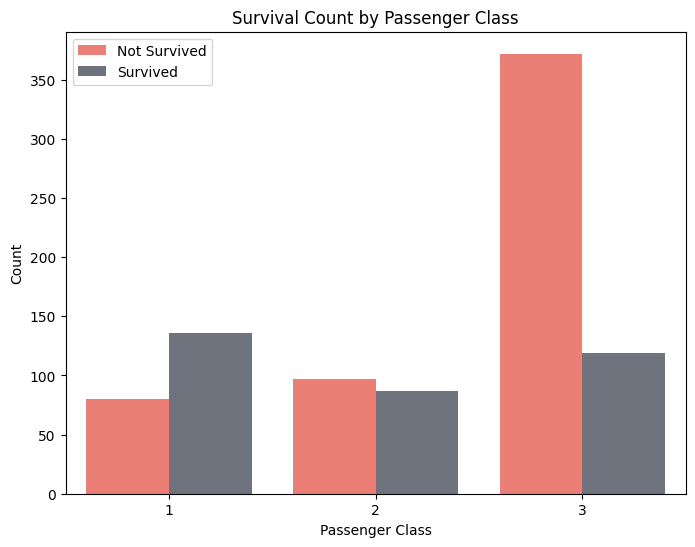

In [14]:
# Survival by Class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=data, palette=['#FF6F61', '#6B7280'])
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

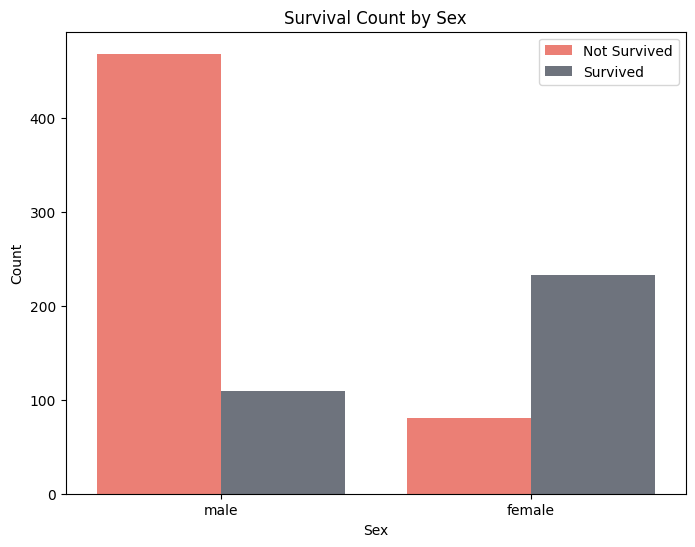

In [15]:
# Survival by Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=data, palette=['#FF6F61', '#6B7280'])
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

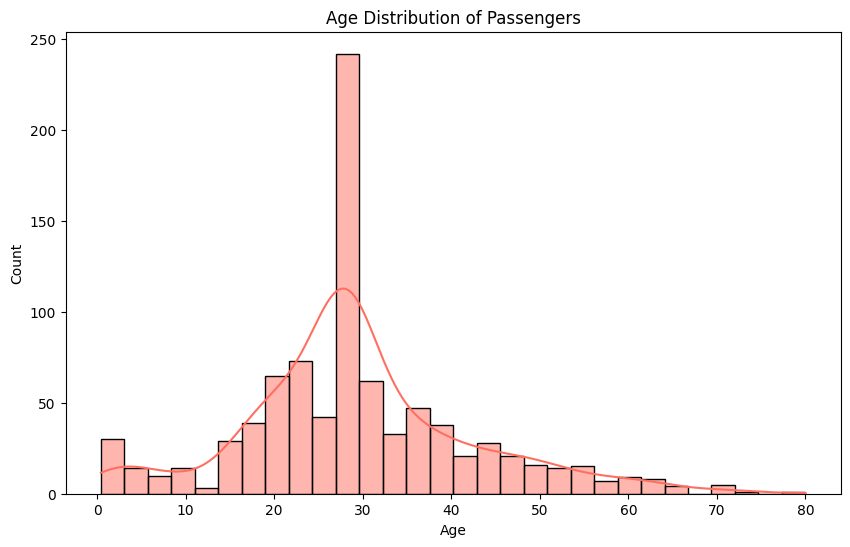

In [16]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', bins=30, kde=True, color='#FF6F61')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

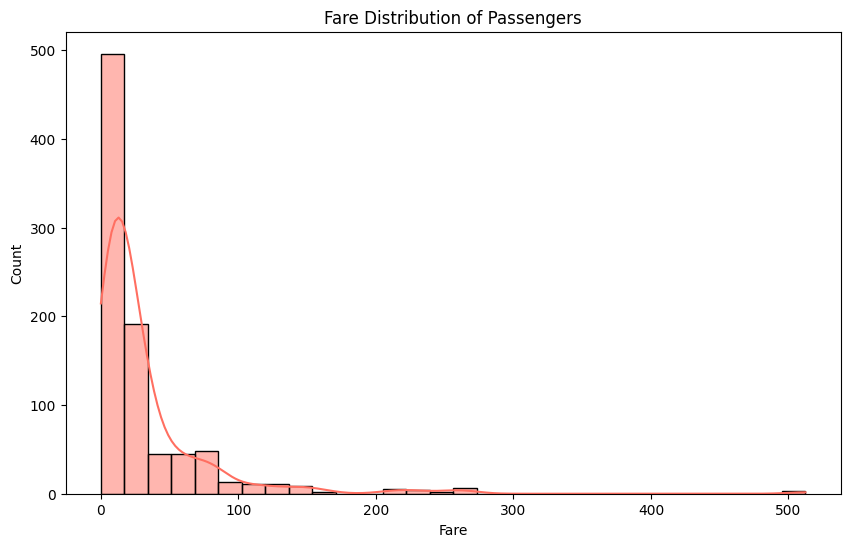

In [17]:
# Fare Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Fare', bins=30, kde=True, color='#FF6F61')
plt.title('Fare Distribution of Passengers')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

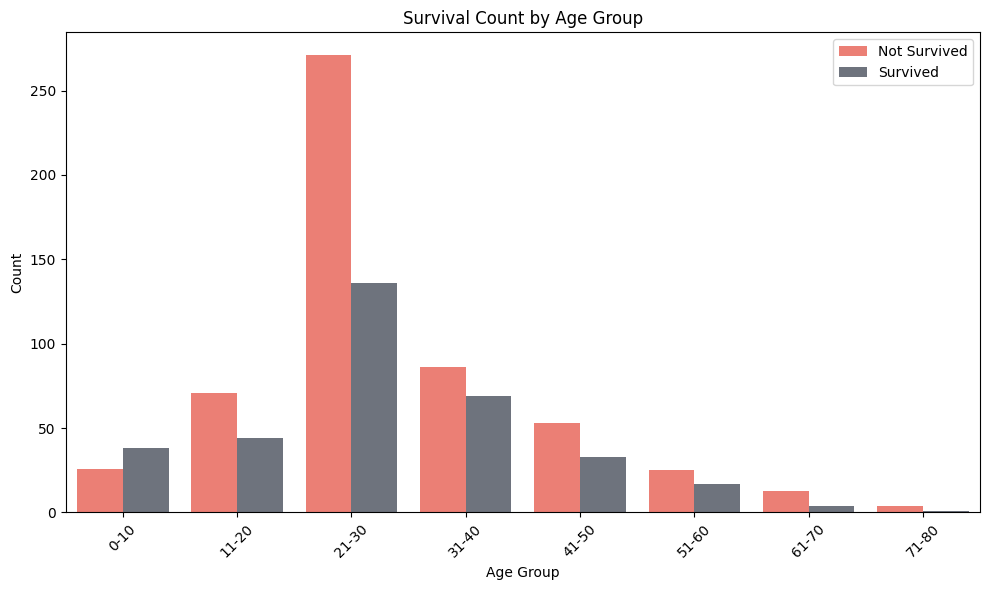

In [21]:
# Additional Analysis

# 1. Survival by Age Group
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Survived', data=data, palette=['#FF6F61', '#6B7280'])
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('survival_by_age.png')  # Save the plot
plt.show()

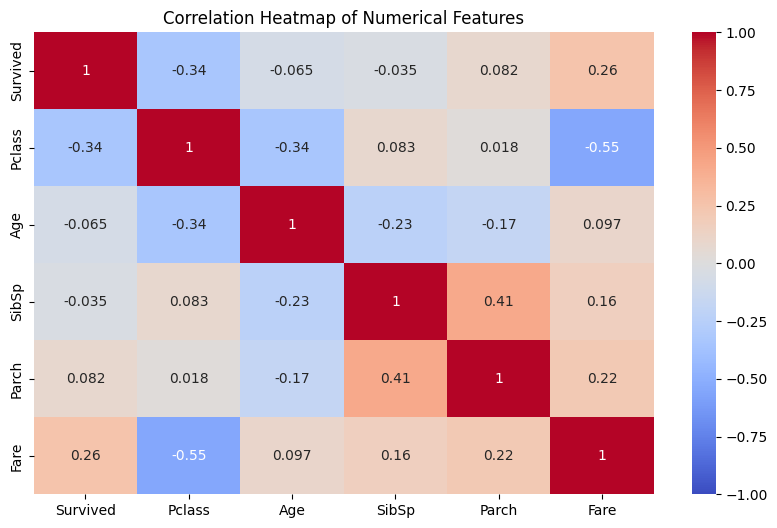

In [22]:
# 2. Correlation Heatmap
plt.figure(figsize=(10, 6))
numeric_data = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('correlation_heatmap.png')  # Save the plot
plt.show()

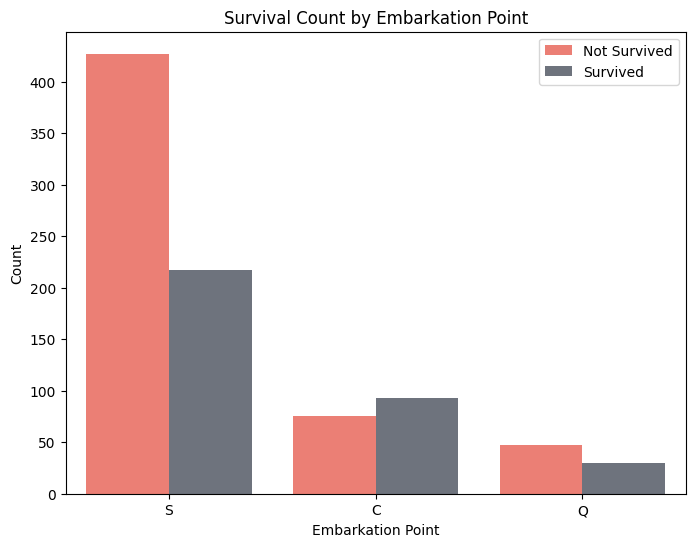

In [23]:
# 3. Survival by Embarkation Point
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=data, palette=['#FF6F61', '#6B7280'])
plt.title('Survival Count by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.savefig('survival_by_embarked.png')  # Save the plot
plt.show()

In [29]:
key_stats = {
    'Total Passengers': len(data),
    'Survival Rate': data['Survived'].mean() * 100,
    'Average Age': data['Age'].mean(),
    'Average Fare': data['Fare'].mean()
}
print("\nKey Statistics:")
for key, value in key_stats.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

print("\nFindings Summary:")
print("- The dataset has 891 passengers with missing values handled by imputation (Age, Fare, Embarked) and dropping Cabin.")
print("- Survival was higher in 1st class (62%) and among females, with age groups 0-10 showing notable survival.")
print("- Outliers exist in Fare (e.g., high fares like $512), suggesting wealthy passengers.")
print("- Negative correlation between Pclass and Survived indicates class-based survival bias.")


Key Statistics:
Total Passengers: 891
Survival Rate: 38.38
Average Age: 29.36
Average Fare: 32.20

Findings Summary:
- The dataset has 891 passengers with missing values handled by imputation (Age, Fare, Embarked) and dropping Cabin.
- Survival was higher in 1st class (62%) and among females, with age groups 0-10 showing notable survival.
- Outliers exist in Fare (e.g., high fares like $512), suggesting wealthy passengers.
- Negative correlation between Pclass and Survived indicates class-based survival bias.
